# Pytorch 预备知识

所有机器学习方法都设计从数据u中提取信息，因此我们需要学习一些关于数据的实用技巧，包括存储、操作和预处理数据

## 2.1 数据操作
为了完成各种数据操作，我们需要某种方法来存储和操作数据，通常需要两件事情
（1） 获取数据
（2） 将数据读入计算机后进行处理
首先在拍pytorch中数据的存储方式为tensor，是一个n维数组，在Numpy中是ndarray；两者之间的区别在**pytorch的支持GPU加速计算，同时计算过程支持自动微分（autograd）

### 2.1.1 入门

In [ ]:
import torch

# 生成序列tensor
torch.arange(12)
# 生成全为0的tensor
torch.zeros(3,4)
# 生成全为1的tensor
torch.ones(3,4)
# 生成随机数的tensor
torch.randn(3,4)
# 根据列表生成tensor
torch.tensor([[1,2,3],[4,5,6]])

In [ ]:
# 针对元素进行设置，数据格式范围
torch.arange(12,dtype=torch.float32).reshape(3,4)

In [ ]:
# 还可以连接不同的张量concatenate，实现端对端的连接，axis==是形状的第一个元素、axis=2是第二个元素
X=torch.arange(12).reshape(3,4)
Y=torch.arange(12).reshape(3,4)
torch.cat((X,Y),dim=0)

In [ ]:
torch.cat((X,Y),dim=1)

In [ ]:
X==Y

In [ ]:
X=torch.arange(12)
# 关于X有哪些自己的属性attribute
# X上本质是做为pytorch自己的tensor object，可以说是一种class，里面包含attribute和method

# 查看形状
X.size

# 对应的方法
X.reshape(3,4)

In [ ]:
# 查看数量
X.numel()

In [ ]:
# 计算cos值
X.cos()

In [ ]:
# 查看tensor中的最大值
X.argmax()

In [ ]:
x=torch.arange(1,10,2)
y=torch.arange(2,11,2)
x,y

元素访问-下标索引，特殊的负数代表从后往前

In [ ]:
X=torch.arange(12).reshape(3,4)
X

In [ ]:
# 下标索引
X[-1]

In [ ]:
X[1:3]

In [ ]:
X[2,3]

In [ ]:
# 切片索引
X[1:3,1:3]

In [ ]:
# 逻辑索引
X[X<9]

### 2.1.2 按照元素的运算符

In [ ]:
x+y

In [ ]:
x-y

In [ ]:
x/y

In [ ]:
x*y

In [ ]:
x**y

In [ ]:
# 按照元素，可以依次分配不同的方法
x.exp()

### 2.1.3 广播机制 broadcasting

在上面的部分中，我们看到如何在相同形状的两个张量上执行元素操作。在某些特殊情况下，我们需要对不同原属的性形状进行操作，这样特殊得运算

### 2.1.4 线性代数计算

In [27]:
A=torch.arange(12,dtype=torch.float32).reshape(3,4)
B=A.clone()
A,A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.]]))

In [28]:
# Hadamara 积
A*B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.]])

In [33]:
# sum\mean\median降维
x=torch.arange(20).reshape(4,5)
x.sum(axis=1)

tensor([10, 35, 60, 85])

In [35]:
x.median(axis=1).values

tensor([ 2,  7, 12, 17])

In [36]:
X.sum(axis=1,keepdim=True)

tensor([[4.],
        [3.],
        [5.],
        [4.]], dtype=torch.float64)

In [ ]:
a=torch.arange(3).reshape((3,1))
b=torch.arange(2).reshape((1,2))
a+b

In [40]:
# 累积求和
x.cumsum(axis=1)

tensor([[ 0,  1,  3,  6, 10],
        [ 5, 11, 18, 26, 35],
        [10, 21, 33, 46, 60],
        [15, 31, 48, 66, 85]])

In [41]:
# 点积
torch.sum(a*b)

tensor(3)

In [42]:
# matirx-vector product
A=torch.arange(20).reshape(4,5)
b=torch.arange(5)
torch.mv(A,b)

tensor([ 30,  80, 130, 180])

In [43]:
# matrix-matrix multiplication
B=torch.arange(20).reshape(5,4)
torch.mm(A,B)

tensor([[120, 130, 140, 150],
        [320, 355, 390, 425],
        [520, 580, 640, 700],
        [720, 805, 890, 975]])

In [46]:
# norm
torch.norm(b.to(torch.double))

tensor(5.4772, dtype=torch.float64)

In [48]:
# 自己测试
torch.sqrt(b.to(torch.double).square().sum())

tensor(5.4772, dtype=torch.float64)

### 2.1.4 切片与索引
这个放大第一节去嘞

## 2.2 数据预处理 - pandas

In [17]:
# 首先新建一个数据集
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n') # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')


In [19]:
 # pandas 导入csv数据
import pandas as pd
data=pd.read_csv(data_file)

In [20]:
# 查看data的数据
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [22]:
inputs,outputs=data.iloc[:,0:2],data.iloc[2]
inputs=inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


/tmp/ipykernel_56831/1205760690.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs=inputs.fillna(inputs.mean())


In [23]:
# 离散值或者类别值的预处理，采用one-hot编码的方式
inputs=pd.get_dummies(inputs,dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [26]:
# 转换为dataframe的形式
X,y=torch.tensor(inputs.values),torch.tensor(outputs)
X,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([4.0000e+00,        nan, 1.7810e+05], dtype=torch.float64))

## 2.3 微积分
看如何使用pytorch来实现自动微分

In [49]:
import torch
x=torch.arange(4.0)

In [50]:
# 有一个地方来存储gradient，这样就不需要重新分配内存
x.requires_grad_(True)
# 默认值 None
x.grad

In [51]:
# 计算一个函数
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [55]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [56]:
# 特殊操作，pytorch通常会累积梯度所以需要清除之前的值
x.grad.zero_()
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [57]:
# 非标量情况下的反向传播
x.grad.zero_()
y=x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [59]:
# 分离计算
x.grad.zero_()
y=x*x
u=y.detach()
z=u*x

z.sum().backward()
x.grad==u

tensor([True, True, True, True])

In [ ]:
# python 控制流的梯度计算
# 暂时看不懂

In [114]:
import math
x=torch.arange(0,2*math.pi,math.pi/100)
x.requires_grad_(True)

tensor([0.0000, 0.0314, 0.0628, 0.0942, 0.1257, 0.1571, 0.1885, 0.2199, 0.2513,
        0.2827, 0.3142, 0.3456, 0.3770, 0.4084, 0.4398, 0.4712, 0.5027, 0.5341,
        0.5655, 0.5969, 0.6283, 0.6597, 0.6912, 0.7226, 0.7540, 0.7854, 0.8168,
        0.8482, 0.8796, 0.9111, 0.9425, 0.9739, 1.0053, 1.0367, 1.0681, 1.0996,
        1.1310, 1.1624, 1.1938, 1.2252, 1.2566, 1.2881, 1.3195, 1.3509, 1.3823,
        1.4137, 1.4451, 1.4765, 1.5080, 1.5394, 1.5708, 1.6022, 1.6336, 1.6650,
        1.6965, 1.7279, 1.7593, 1.7907, 1.8221, 1.8535, 1.8850, 1.9164, 1.9478,
        1.9792, 2.0106, 2.0420, 2.0735, 2.1049, 2.1363, 2.1677, 2.1991, 2.2305,
        2.2619, 2.2934, 2.3248, 2.3562, 2.3876, 2.4190, 2.4504, 2.4819, 2.5133,
        2.5447, 2.5761, 2.6075, 2.6389, 2.6704, 2.7018, 2.7332, 2.7646, 2.7960,
        2.8274, 2.8588, 2.8903, 2.9217, 2.9531, 2.9845, 3.0159, 3.0473, 3.0788,
        3.1102, 3.1416, 3.1730, 3.2044, 3.2358, 3.2673, 3.2987, 3.3301, 3.3615,
        3.3929, 3.4243, 3.4558, 3.4872, 

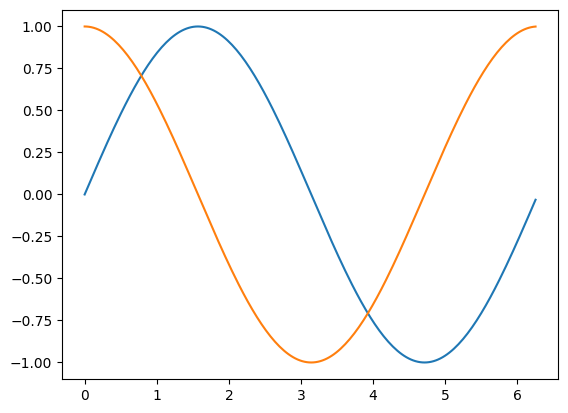

In [116]:
import matplotlib.pyplot as plt
plt.plot(x.detach().numpy(),x.detach().sin())
y=torch.sin(x).sum()
y.backward()
plt.plot(x.detach().numpy(),x.grad)


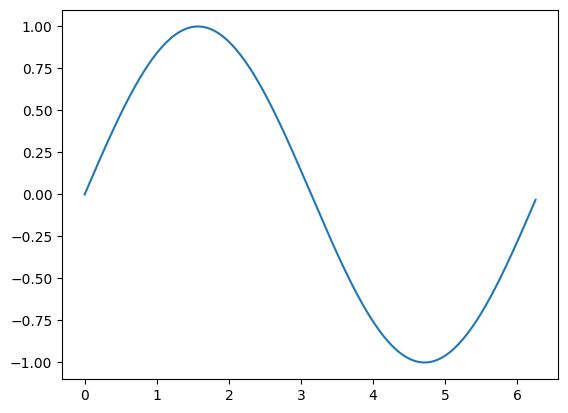